## Q1

### a)

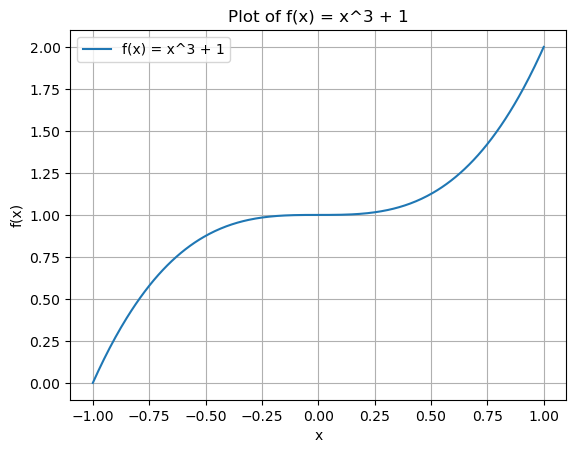

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# define f(x)
def f(x):
    return x**3 + 1


# define x range of values
x = np.linspace(-1, 1, 400)
y = f(x)

# plot the function
plt.plot(x, y, label="f(x) = x^3 + 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = x^3 + 1")
plt.legend()
plt.grid(True)
plt.show()

### b)

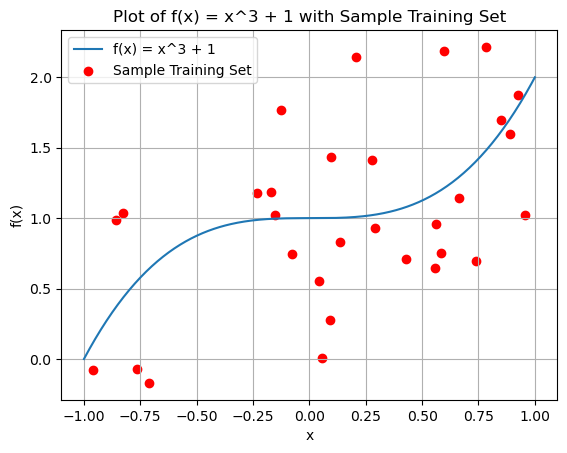

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# define f(x)
def f(x):
    return x**3 + 1


# define x range of values
x = np.linspace(-1, 1, 400)
y = f(x)

# generate sample training set
np.random.seed(0)
x_sample = np.random.uniform(-1, 1, 30)
y_sample = f(x_sample) + np.random.normal(0, 0.5, x_sample.shape)

# plot the function
plt.plot(x, y, label="f(x) = x^3 + 1")

# plot the sample training set
plt.scatter(x_sample, y_sample, color="red", label="Sample Training Set")

# add labels and title
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = x^3 + 1 with Sample Training Set")
plt.legend()
plt.grid(True)
plt.show()

### c)

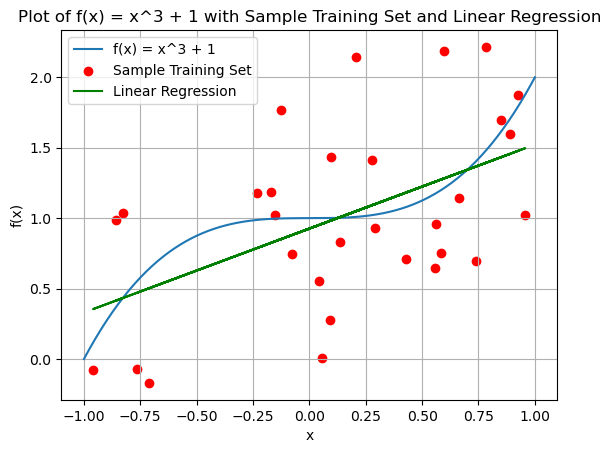

Training set error (sum of squares): 9.321640009926169


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# define f(x)
def f(x):
    return x**3 + 1


# define x range of values
x = np.linspace(-1, 1, 400)
y = f(x)

# generate sample training set
np.random.seed(0)
x_sample = np.random.uniform(-1, 1, 30)
y_sample = f(x_sample) + np.random.normal(0, 0.5, x_sample.shape)

# reshape x_sample for sklearn
x_sample_reshaped = x_sample.reshape(-1, 1)

# perform linear regression
model = LinearRegression()
model.fit(x_sample_reshaped, y_sample)

# predict y values using the model
y_pred = model.predict(x_sample_reshaped)

# calculate training set error (sum of squares)
training_error = mean_squared_error(y_sample, y_pred) * len(y_sample)

# plot the function
plt.plot(x, y, label="f(x) = x^3 + 1")

# plot the sample training set
plt.scatter(x_sample, y_sample, color="red", label="Sample Training Set")

# plot the linear regression line
plt.plot(x_sample, y_pred, color="green", label="Linear Regression")

# add labels and title
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = x^3 + 1 with Sample Training Set and Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"Training set error (sum of squares): {training_error}")


### d)

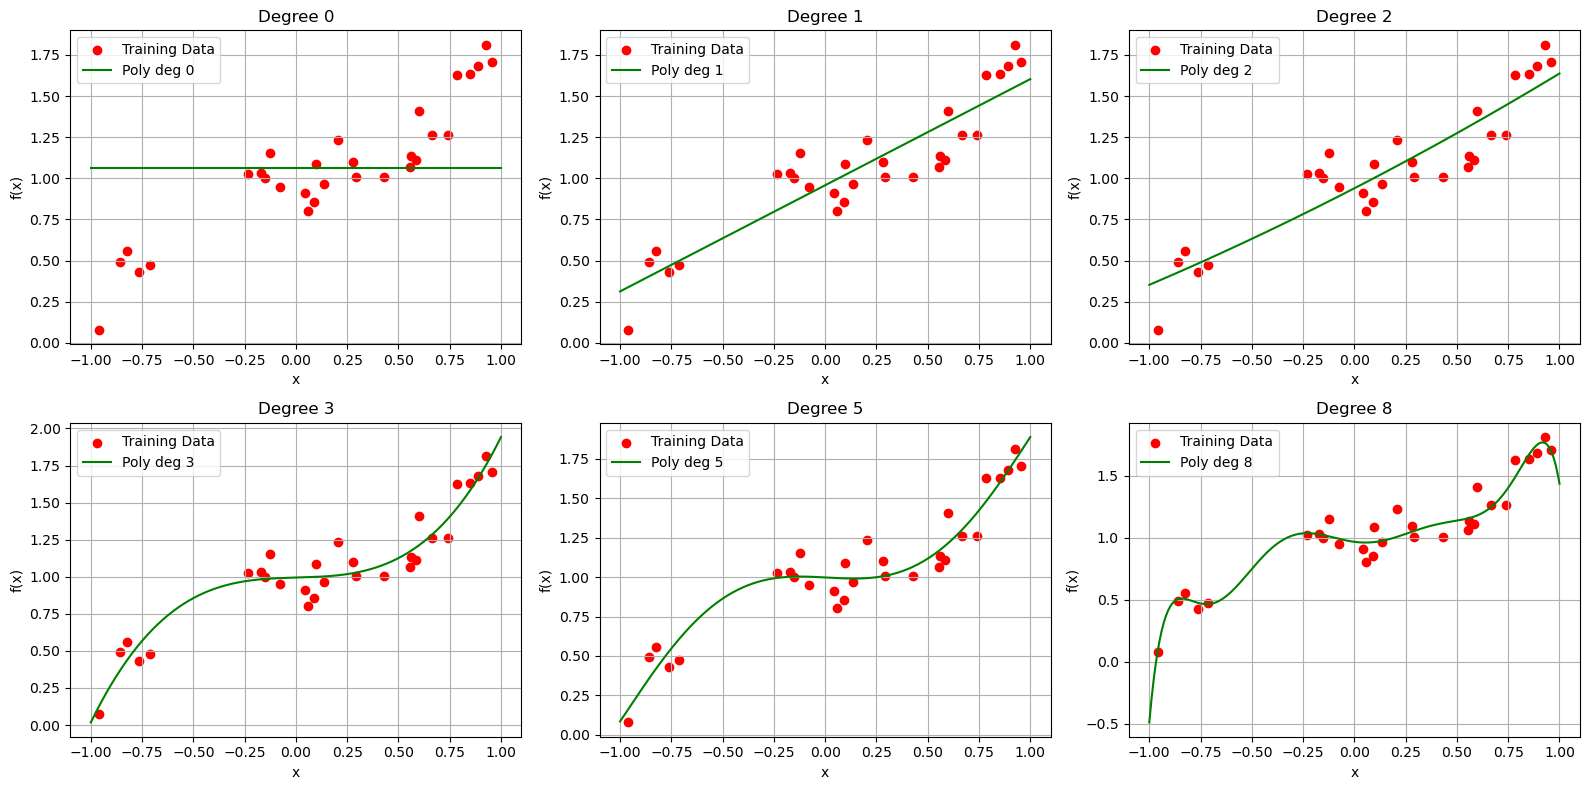

Degree 0 training error (sum of squares): 4.71861407869807
Degree 1 training error (sum of squares): 0.793137069064157
Degree 2 training error (sum of squares): 0.7838063787338989
Degree 3 training error (sum of squares): 0.3653515202150352
Degree 5 training error (sum of squares): 0.35821818257963234
Degree 8 training error (sum of squares): 0.2586396605300207


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


# define f(x)
def f(x):
    return x**3 + 1


# define x range of values
x = np.linspace(-1, 1, 400)
y = f(x)

# generate sample training set
np.random.seed(0)
x_sample = np.random.uniform(-1, 1, 30)
y_sample = f(x_sample) + np.random.normal(0, 0.1, x_sample.shape)

# reshape x_sample for sklearn
# print(f"x_sample: {x_sample}")
x_sample_reshaped = x_sample.reshape(-1, 1)
# print(f"x_sample_reshaped: {x_sample_reshaped}")

# Define the degrees of the polynomial to experiment with
degrees = [0, 1, 2, 3, 5, 8]  # You can add or remove degrees to experiment
errors = {}  # Dictionary to store training errors for each degree

# Create subplots: 2 rows x 3 columns (total 6 subplots)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()  # flatten the 2d array for ease of iteration

# Loop through each polynomial degree and perform regression
for idx, degree in enumerate(degrees):
    ax = axes[idx]  # current subplot
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x_sample_reshaped)

    # Fit a linear model on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_sample)

    # Predict on the training set
    y_poly_pred = poly_model.predict(X_poly)

    # Calculate training set error (sum of squares)
    error = mean_squared_error(y_sample, y_poly_pred) * len(y_sample)
    errors[degree] = error

    # Prepare data for plotting predictions smoothly
    X_line = x.reshape(-1, 1)
    X_line_poly = poly.transform(X_line)
    y_line_pred = poly_model.predict(X_line_poly)

    # Plot the training data and the polynomial regression line
    ax.scatter(x_sample, y_sample, color="red", label="Training Data")
    ax.plot(x, y_line_pred, label=f"Poly deg {degree}", color="green")

    # Add title and labels to the subplot
    ax.set_title(f"Degree {degree}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.grid(True)
    ax.legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# Print out the training errors for each polynomial degree
for degree in degrees:
    print(f"Degree {degree} training error (sum of squares): {errors[degree]}")

## Q2

### b)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read CSV data
df = pd.read_csv("pokemonregr.csv")

# Drop rows with missing values to ensure clean dataset
df.dropna(inplace=True)

# Separate input features (all columns except weight_kg) and target (weight_kg)
# The features include: attack, defense, height_m, sp_attack, sp_defense, speed
X = df[["attack", "defense", "height_m", "sp_attack", "sp_defense", "speed"]]
y = df["weight_kg"]

# print(f"X: {X}")
# print(f"y: {y}")

# Create an instance of the Linear Regression model and train it
model = LinearRegression()
model.fit(X, y)

### c)

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read CSV data
df = pd.read_csv("pokemonregr.csv")

# Drop rows with missing values to ensure clean dataset
df.dropna(inplace=True)

# Separate input features (all columns except weight_kg) and target (weight_kg)
# The features include: attack, defense, height_m, sp_attack, sp_defense, speed
X = df[["attack", "defense", "height_m", "sp_attack", "sp_defense", "speed"]]
y = df["weight_kg"]

# print(f"X: {X}")
# print(f"y: {y}")

# Create an instance of the Linear Regression model and train it
model = LinearRegression()
model.fit(X, y)

# Print the intercept and coefficients for each feature
print("Intercept:", model.intercept_)
features = ["attack", "defense", "height_m", "sp_attack", "sp_defense", "speed"]
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")


Intercept: -56.394582146058255
Coefficients:
attack: 0.37739755313126866
defense: 0.5677215201114791
height_m: 53.514625494459125
sp_attack: 0.024599876541904542
sp_defense: 0.1534530334919002
speed: -0.42153981743615565


### d)

height_m

### e)

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Read CSV data
df = pd.read_csv("pokemonregr.csv")

# Drop rows with missing values to ensure clean dataset
df.dropna(inplace=True)

# Separate input features (all columns except weight_kg) and target (weight_kg)
# The features include: attack, defense, height_m, sp_attack, sp_defense, speed
X = df[["attack", "defense", "height_m", "sp_attack", "sp_defense", "speed"]]
y = df["weight_kg"]

# Normalize the input features using StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Fit a new linear regression model using normalized features
model_norm = LinearRegression()
model_norm.fit(X_norm, y)

# Print the intercept and coefficients for each feature (normalized data)
print("\nAfter normalization:")
print("Intercept:", model_norm.intercept_)
features = ["attack", "defense", "height_m", "sp_attack", "sp_defense", "speed"]
print("Coefficients:")
for feature, coef in zip(features, model_norm.coef_):
    print(f"{feature}: {coef}")



After normalization:
Intercept: 61.378104993597965
Coefficients:
attack: 12.153370358231532
defense: 17.47803452519487
height_m: 57.776231067705204
sp_attack: 0.7912143451280542
sp_defense: 4.295294418460291
speed: -12.176468106399419


## Q3

### a)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df = pd.read_csv("w3classif.csv", header=None)
df.columns = ["feature1", "feature2", "target"]

# Separate features and target
X = df[["feature1", "feature2"]]
y = df["target"]

# Fit a logistic regression model to the data
model = LogisticRegression(solver="lbfgs")
model.fit(X, y)

# Print the model parameter values
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-4.67292576]
Coefficients: [[1.76160217 1.76094615]]


### b)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df = pd.read_csv("w3classif.csv", header=None)
df.columns = ["feature1", "feature2", "target"]

# Separate features and target
X = df[["feature1", "feature2"]]
y = df["target"]

# Fit a logistic regression model to the data
model = LogisticRegression(solver="lbfgs")
model.fit(X, y)

# Create a DataFrame for the test point with valid feature names
x_test_df = pd.DataFrame([[1.1, 1.1]], columns=["feature1", "feature2"])

# Predict the probability for class 1 for test point x' = (1.1, 1.1)
p = model.predict_proba(x_test_df)[0, 1]
print("Predicted probability p(y'=1 | x'=(1.1,1.1)):", p)

Predicted probability p(y'=1 | x'=(1.1,1.1)): 0.3104272549529393


### c)

Intercept: [-4.65977334]
Coefficients: [[1.757695   1.75760916]]
Predicted probability p(y'=1 | x'=(1.1,1.1)): 0.3115380089231582


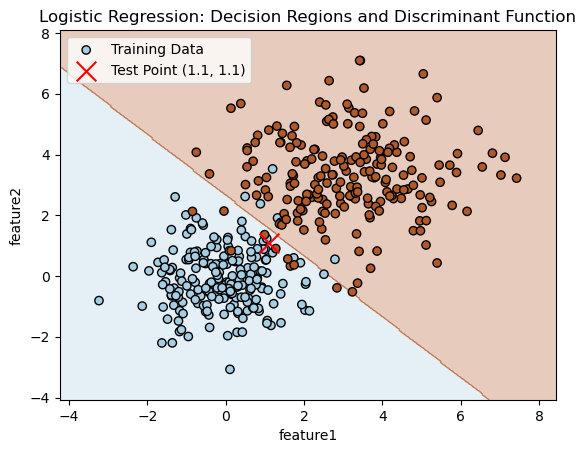

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Read the CSV file
df = pd.read_csv("w3classif.csv")
df.columns = ["feature1", "feature2", "target"]

# Separate features and target
X = df[["feature1", "feature2"]]
y = df["target"]

# Fit a logistic regression model to the data
model = LogisticRegression(solver="lbfgs")
model.fit(X, y)

# Print the model parameter values
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a DataFrame for the test point with valid feature names
x_test_df = pd.DataFrame([[1.1, 1.1]], columns=["feature1", "feature2"])

# Predict the probability for class 1 for test point x' = (1.1, 1.1)
p = model.predict_proba(x_test_df)[0, 1]
print("Predicted probability p(y'=1 | x'=(1.1,1.1)):", p)

# Plot the data along with the decision regions
# Create a mesh grid covering the feature space
x_min, x_max = X["feature1"].min() - 1, X["feature1"].max() + 1
y_min, y_max = X["feature2"].min() - 1, X["feature2"].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Convert grid to DataFrame with valid feature names to avoid warning
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=["feature1", "feature2"])

# Predict on every point in the grid using grid_df
Z = model.predict(grid_df)
Z = Z.reshape(xx.shape)

# Plot contour for decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the original data points
plt.scatter(
    X["feature1"],
    X["feature2"],
    c=y,
    edgecolor="k",
    cmap=plt.cm.Paired,
    label="Training Data",
)

# Mark test data point x' = (1.1, 1.1)
plt.scatter(
    x_test_df["feature1"],
    x_test_df["feature2"],
    color="red",
    marker="x",
    s=200,
    label="Test Point (1.1, 1.1)",
)

plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Logistic Regression: Decision Regions and Discriminant Function")
plt.legend()
plt.show()
